

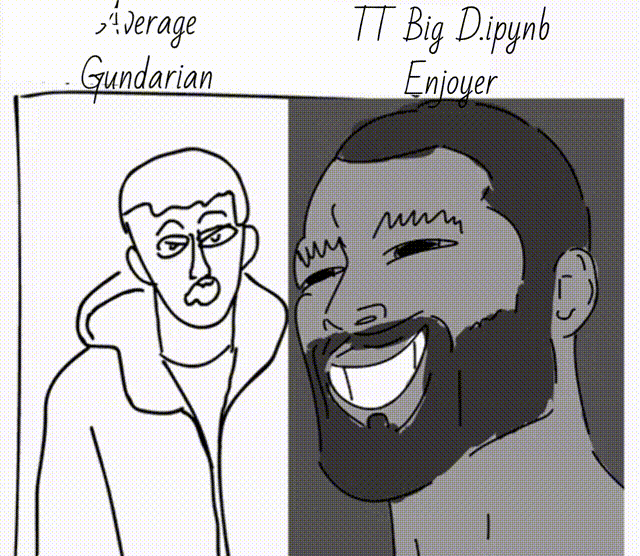

# Praktikum V

Selamat datang pada praktikum unggulan minggu ke - 5. 


![1_L0464qoX7pSkIQMBcF73Tg.png](attachment:1_L0464qoX7pSkIQMBcF73Tg.png)

Gambar diatas menunjukkan tahapan yang Anda perlu lakukan ketika ingin membangun sebuah model artificial intelligence. 
Pada minggu ini Anda akan melakukan fase data cleansing atau pembersihan data. Tahapan ini biasanya dilakuakan sebelum anda melakukan tahapan EDA yang telah Anda pelajari sebelumnya. Tahapan ini perlu dilakukan jika data yang Anda miliki tidak 'bersih', sehingga perlu dilakukan pemrosesan terlebih dahulu (tahapan pre-processing) sebelum data tersebut masuk kedalam algoritma pembangunan model. 

Materi praktikum ini dibagi menjadi 2 bagian dengan menggunakan dua dataset yang berbeda. Adapun operasi akan Anda lakukan antara lain 
* Melihat bentuk data (shape) dari data train dan test set
* Cek data NaN, bila ada maka hapus/drop data NaN tsb
* Cek outliers, bila ada maka hapus/drop outliers tsb
* Melakukan konversi jenis kolom yang relevan.
* Melakukan transformasi terhadap data yang bersifat kategori 

Operasi yang Anda lakukan pada tahapan pembersihan data sangat bergantung pada karakteristik permasalahan, karakter data, serta jenis data yang terdapat dalam dataset Anda. Sebagai referensi, berikut bagan dari berbagai macam tipe data yang mungkin Anda temui dalam sebuah dataset. 




![8UUywzzaMhY2ZGHrWE7VkA_b.png](attachment:8UUywzzaMhY2ZGHrWE7VkA_b.png)

In [1]:
import numpy as np 
import pandas as pd 
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset 1

Dataset yang akan Anda gunakan pada praktikum kali ini adalah dataset komposisi beton (concrete).

In [2]:
# Load data train dan test ke dalam pandas dataframe
# dataset : https://gitlab.com/andreass.bayu/file-directory/-/raw/main/new_concreate.csv
concrete = pd.read_csv("https://gitlab.com/andreass.bayu/file-directory/-/raw/main/new_concreate.csv")

In [3]:
# menghasilkan jumlah baris dan jumlah kolom (bentuk data) pada data train dengan fungsi .shape
concrete.shape

(1030, 9)

In [4]:
# menampilkan 10 data teratas
concrete.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,NaN,203.5,NaN,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,NaN,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,NaN,228.0,NaN,932.0,670.0,28,45.85
4,154.8,183.4,NaN,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,NaN,NaN,192.0,NaN,889.8,945.0,90,21.86
6,166.8,250.2,NaN,203.5,NaN,975.6,692.6,7,15.75
7,251.4,NaN,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,NaN,NaN,192.0,NaN,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [5]:
# fungsi describe() untuk mengetahui statistika data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,559.000000,464.000000,1030.000000,651.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,136.158676,120.288793,181.567282,9.816897,972.918932,773.580485,45.662136,35.817961
std,104.506364,72.351823,33.675470,21.354219,4.580328,77.753954,80.175980,63.169912,16.705742
min,102.000000,11.000000,24.500000,121.800000,1.700000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,95.000000,97.850000,164.900000,6.950000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,135.700000,121.400000,185.000000,9.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,189.000000,141.000000,192.000000,11.600000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
#cek nilai yang hilang / missing values di dalam data train
concrete.isnull().sum().sort_values(ascending=False)

ash             566
slag            471
superplastic    379
strength          0
age               0
fineagg           0
coarseagg         0
water             0
cement            0
dtype: int64

Missing values adalah nilai yang tidak terdefinisi di dataset. Bentuknya beragam, bisa berupa blank cell, ataupun simbol-simbol tertentu seperti NaN (Not a Number), NA (Not Available), ?, -, dan sebagainya. Missing values dapat menjadi masalah dalam analisis data serta tentunya dapat mempengaruhi hasil modelling machine learning.

**Lakukan pemeriksaan dan perubahan data kosong setiap kolom pada data train:**
1. cement (kg)
2. slag (blast furnace slag, kg)
3. ash (fly ash, kg)
4. water (kg)
5. superplastic (superplasticizer, kg)
6. coarseagg (coarse aggregate, kg)
7. fineagg (fine aggregate, kg)
8. age (days, 1-365)
9. strength (Concrete compressive strength, MPa)

### Instruksi Praktikum untuk mahasiswa FIKTI dan FTI (kecuali Teknik Industri, Teknik Mesin dan Agroteknologi)

* Lakukan teknik data cleaning untuk data yang bernilai NaN pada Dataset concrete.  (Ubah data bernilai NaN menjadi 0)
* Transformasikan data pada kolom strength menjadi kolom baru bernama 'Category', dengan ketentuan :
   1. jika nilai >= 65 = 'Hard'
   2. jika nilai >= 40 = 'Medium'
   3. Jika nilai < 40 = 'Light'
* Lakukan analisis histogram untuk pengaruh kolom age terhadap kolom strength, apakah yang dapat Anda simpulkan ?
* Cari tahu komposisi concrete yang memiliki kekuatan tertinggi dan terendah
* Berikan kesimpulan akhir anda terhadap pengaruh komposisi concrete berdasarkan dataset yang digunakan

### Instruksi Praktikum mahasiswa Tekrek : Teknik Industri, Teknik Mesin, Agroteknologi dan FTSP 

* Transformasikan data pada kolom strength menjadi kolom baru bernama 'Category', dengan ketentuan :
   1. jika nilai >= 65 = 'Hard'
   2. jika nilai >= 40 = 'Medium'
   3. Jika nilai < 40 = 'Light'
* Lakukan analisis histogram untuk pengaruh kolom age terhadap kolom strength, apakah yang dapat Anda simpulkan ?
* Cari tahu komposisi concrete yang memiliki kekuatan tertinggi dan terendah
* Berikan kesimpulan akhir anda terhadap pengaruh komposisi concrete berdasarkan dataset yang digunakan

<h1><center> JAWABAN </h1></center>

In [8]:
concrete.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

### 1. Lakukan teknik data cleaning untuk data yang bernilai NaN pada Dataset concrete. (Ubah data bernilai NaN menjadi 0)

In [22]:
concrete = concrete.fillna(0)
print(concrete.isna().sum())
concrete.head()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
Category        0
dtype: int64


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Category
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,Light
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,Light
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,Light
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,Medium
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,Light


### 2. Transformasikan data pada kolom strength menjadi kolom baru bernama 'Category',

In [23]:
def get_category(x):
    if x >= 65:
        return 'Hard'
    elif x >= 40:
        return 'Medium'
    return 'Light'

In [24]:
concrete['Category'] = concrete['strength'].apply(get_category)
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Category
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,Light
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,Light
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,Light
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,Medium
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,Light


### 3. Lakukan analisis histogram untuk pengaruh kolom age terhadap kolom strength, apakah yang dapat Anda simpulkan ?

Text(0.5, 1.0, 'histogram strength')

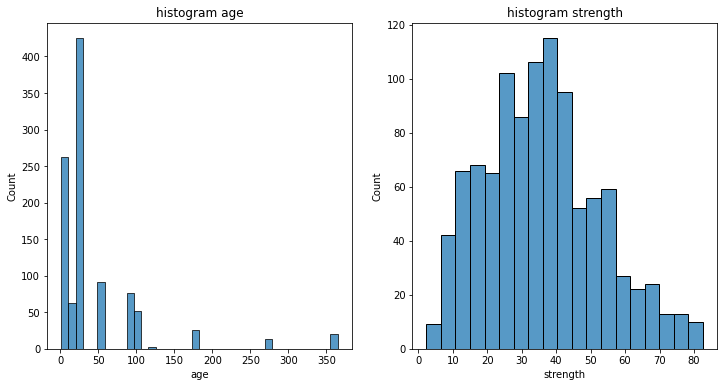

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(concrete['age'], ax=axes[0]).set_title('histogram age')
sns.histplot(concrete['strength'], ax=axes[1]).set_title('histogram strength')

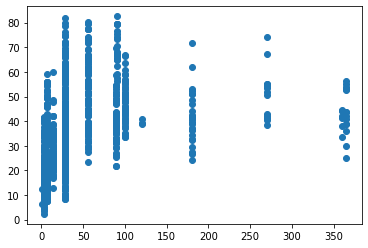

In [33]:
plt.scatter(concrete['age'], concrete['strength'])

### 4. Cari tahu komposisi concrete yang memiliki kekuatan tertinggi dan terendah

In [35]:
print('Komposisi terkuat')
concrete[concrete['strength']==concrete['strength'].max()]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Category
950,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.6,Hard


In [36]:
print('Komposisi terlemah')
concrete[concrete['strength']==concrete['strength'].min()]

Komposisi terlemah


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Category
230,108.3,162.4,0.0,203.5,0.0,938.2,849.0,3,2.33,Light


### 5. Berikan kesimpulan akhir anda terhadap pengaruh komposisi concrete berdasarkan dataset yang digunakan

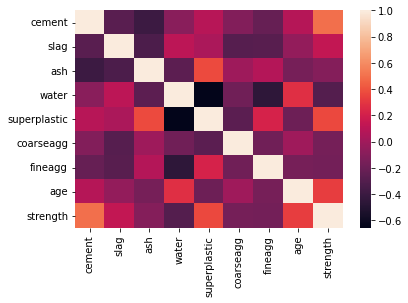

In [37]:
sns.heatmap(concrete.corr())

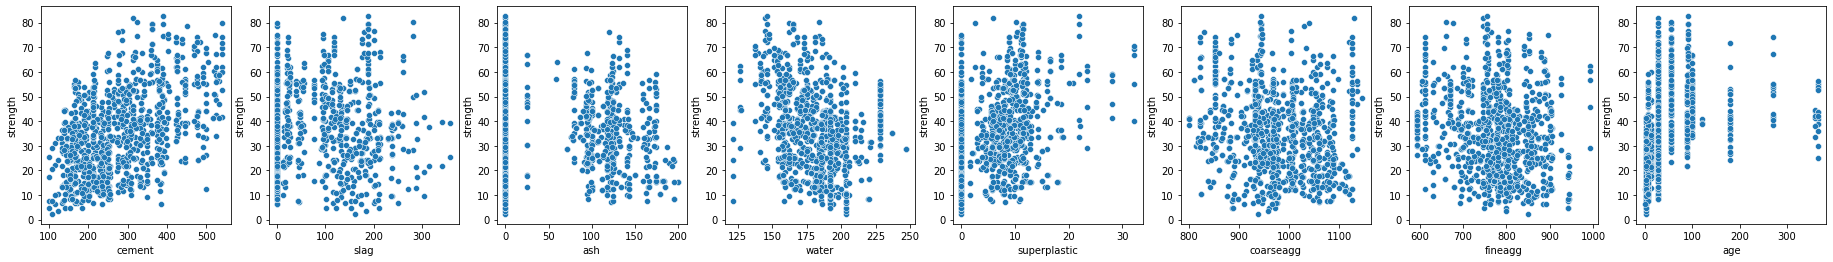

In [41]:
cols = concrete.columns[:-2]
fig, axes = plt.subplots(1, len(cols), figsize=(4 * len(cols), 4))

for i, col in enumerate(cols):
    sns.scatterplot(x=concrete[col], y=concrete['strength'], ax=axes[i])